Baseline and Plots on Distribution

In [77]:
import pandas as pd
from IPython.display import display

# Load the parquet files
driver_order_mapping = pd.read_parquet('Flaschenpost_Datathon_2025_Dataset 1/masked_driver_order_mapping.parquet')
order_articles = pd.read_parquet('Flaschenpost_Datathon_2025_Dataset 1/masked_order_articles.parquet')
orders = pd.read_parquet('Flaschenpost_Datathon_2025_Dataset 1/masked_orders.parquet')
service_times = pd.read_parquet('Flaschenpost_Datathon_2025_Dataset 1/masked_service_times.parquet')

# Display the first few rows of each dataframe to verify the data
display(driver_order_mapping.head())
display(order_articles.head())
display(orders.head())
display(service_times.head())

,web_order_id,driver_id
0,51222,182
1,53503,182
2,166709,182
3,136190,182
4,176394,182


,warehouse_id,box_id,article_id,article_weight_in_g,web_order_id
0,3,NaN,3657,17250,1250399
1,3,NaN,3657,17250,1250154
2,32,NaN,2576,17000,1296951
3,32,NaN,3975,15100,978668
4,25,NaN,3670,11000,104995


,warehouse_id,order_time,has_elevator,floor,is_pre_order,is_business,web_order_id,customer_id
0,18,2024-12-17 09:00:00+01:00,False,0.0,True,True,806432,166859
1,8,2024-12-10 09:45:00+01:00,False,0.0,True,True,678738,167463
2,8,2024-11-21 10:45:00+01:00,False,NaN,True,True,347665,49336
3,13,2024-11-08 10:00:00+01:00,False,0.0,True,True,110643,172552
4,13,2025-01-06 13:15:48.730000+01:00,False,NaN,False,True,1139043,136281


,service_time_start,service_time_end,service_time_in_minutes,order_datetime,web_order_id,driver_id,trip_id,customer_id
0,2024-11-11 21:48:59+01:00,2024-11-11 21:57:56+01:00,8.950000,2024-11-11 20:45:00+01:00,1,3621,29687,35422
1,2024-11-05 13:27:30+01:00,2024-11-05 13:45:05+01:00,17.583333,2024-11-05 13:15:00+01:00,2,6575,10097,159165
2,2024-11-05 21:52:03+01:00,2024-11-05 22:09:28+01:00,17.416666,2024-11-05 20:00:00+01:00,3,6811,12316,377355
3,2024-11-12 21:01:30.013000+01:00,2024-11-12 21:15:30.087000+01:00,14.000000,2024-11-12 19:00:00+01:00,4,5183,31795,146455
4,2024-11-01 15:28:07+01:00,2024-11-01 15:37:01+01:00,8.900000,2024-11-01 13:45:00+01:00,5,694,966,210296


In [78]:
# Merge all dataframes on 'web_order_id'
merged_df = driver_order_mapping.merge(order_articles, on='web_order_id') \
                                .merge(orders, on='web_order_id') \
                                .merge(service_times, on='web_order_id')

# Display the first few rows of the merged dataframe to verify
display(merged_df.head())

# Print the number of rows in the merged dataframe
print(f"Number of rows in the merged dataframe: {len(merged_df)}")

,web_order_id,driver_id_x,warehouse_id_x,box_id,article_id,article_weight_in_g,warehouse_id_y,order_time,has_elevator,floor,is_pre_order,is_business,customer_id_x,service_time_start,service_time_end,service_time_in_minutes,order_datetime,driver_id_y,trip_id,customer_id_y
0,51222,182,27,NaN,1798,15100,27,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,182,6296,523043
1,51222,182,27,NaN,1798,15100,27,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,182,6296,523043
2,51222,182,27,NaN,1798,15100,27,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,182,6296,523043
3,51222,182,27,NaN,1798,15100,27,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,182,6296,523043
4,51222,182,27,NaN,1798,15100,27,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,182,6296,523043


Number of rows in the merged dataframe: 15584863


In [79]:
# Drop columns that end with '_y'
merged_df = merged_df.loc[:, ~merged_df.columns.str.endswith('_y')]

# Rename columns that end with '_x' to remove the suffix
merged_df.columns = merged_df.columns.str.replace('_x', '')

# Display the first few rows of the cleaned dataframe to verify
display(merged_df.head())

,web_order_id,driver_id,warehouse_id,box_id,article_id,article_weight_in_g,order_time,has_elevator,floor,is_pre_order,is_business,customer_id,service_time_start,service_time_end,service_time_in_minutes,order_datetime,trip_id
0,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296
1,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296
2,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296
3,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296
4,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296


In [80]:
# Check for non-null entries in the 'box_id' column
box_id_entries = merged_df['box_id'].notnull().sum()

# Display the result
print(f"Number of non-null entries in 'box_id': {box_id_entries}")

Number of non-null entries in 'box_id': 8090551


In [81]:
# Find the smallest box_id
smallest_box_id = 24510740

# Filter the dataframe for the smallest box_id
smallest_box_df = merged_df[merged_df['box_id'] == smallest_box_id]

# Print the rows of the filtered dataframe
print(smallest_box_df)

          web_order_id  driver_id  warehouse_id      box_id  article_id  \
14397497        754862        681            22  24510740.0        8484   
14397498        754862        681            22  24510740.0       22384   
14397499        754862        681            22  24510740.0       22384   
14397500        754862        681            22  24510740.0       23122   
14397501        754862        681            22  24510740.0       22813   
14397502        754862        681            22  24510740.0       23122   
14397503        754862        681            22  24510740.0        8790   
14397504        754862        681            22  24510740.0        8790   
14397505        754862        681            22  24510740.0        8484   

          article_weight_in_g                       order_time  has_elevator  \
14397497                  163 2024-12-13 10:34:43.860000+01:00         False   
14397498                  450 2024-12-13 10:34:43.860000+01:00         False   
14397499 

In [82]:
# Calculate the sum of article weights for each web_order_id
merged_df['total_article_weight_in_g'] = merged_df.groupby('web_order_id')['article_weight_in_g'].transform('sum')

# Count the number of groups
num_groups = merged_df.groupby('web_order_id').ngroups
print(f"Number of groups: {num_groups}")

# Display the first few rows of the updated dataframe to verify
display(merged_df.head())

Number of groups: 1534634


,web_order_id,driver_id,warehouse_id,box_id,article_id,article_weight_in_g,order_time,has_elevator,floor,is_pre_order,is_business,customer_id,service_time_start,service_time_end,service_time_in_minutes,order_datetime,trip_id,total_article_weight_in_g
0,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500
1,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500
2,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500
3,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500
4,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500


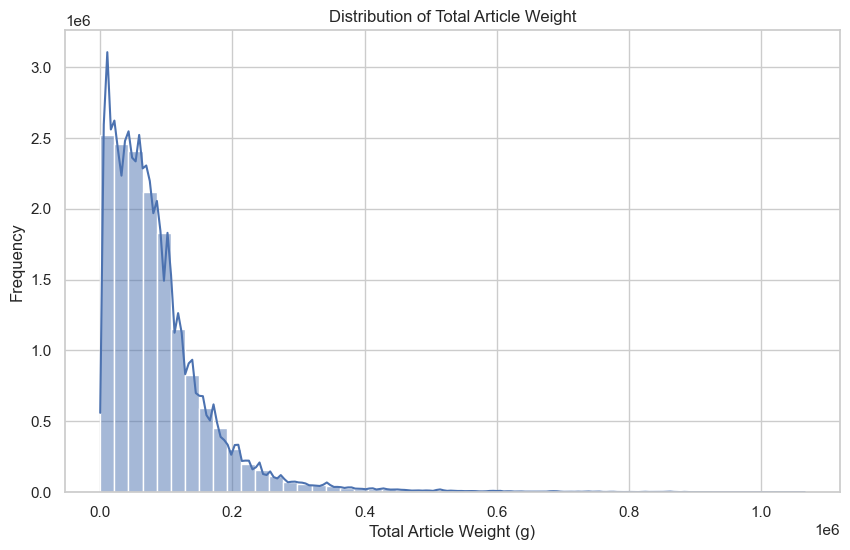

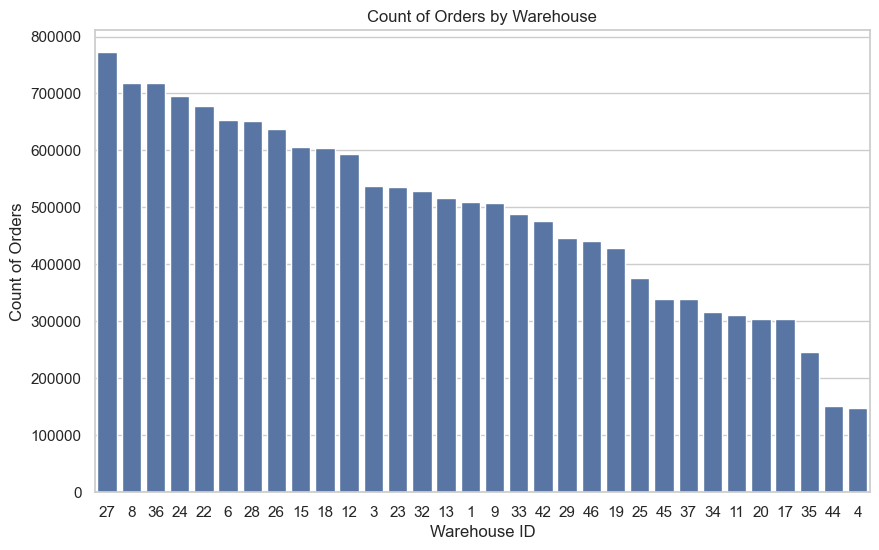

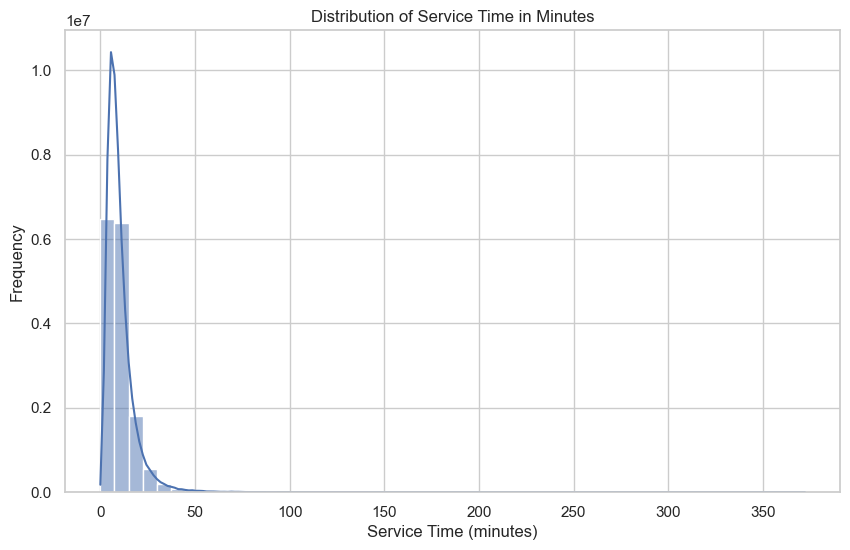

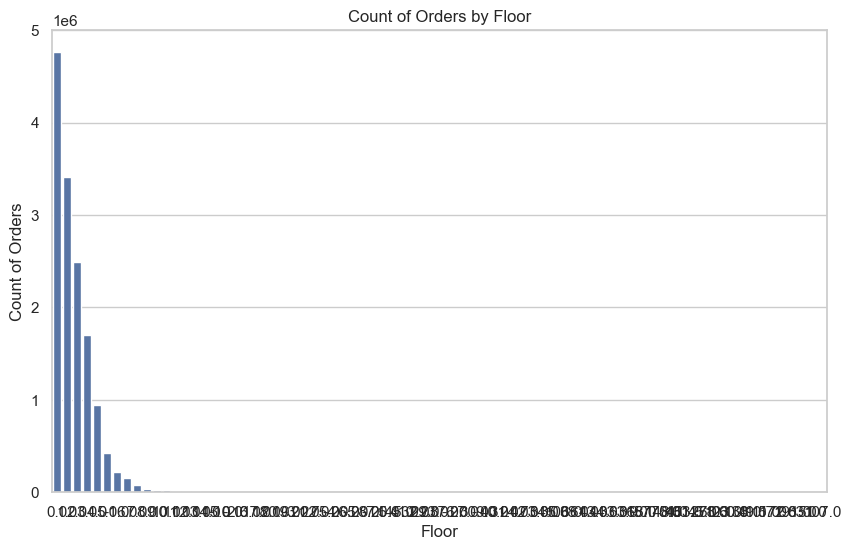

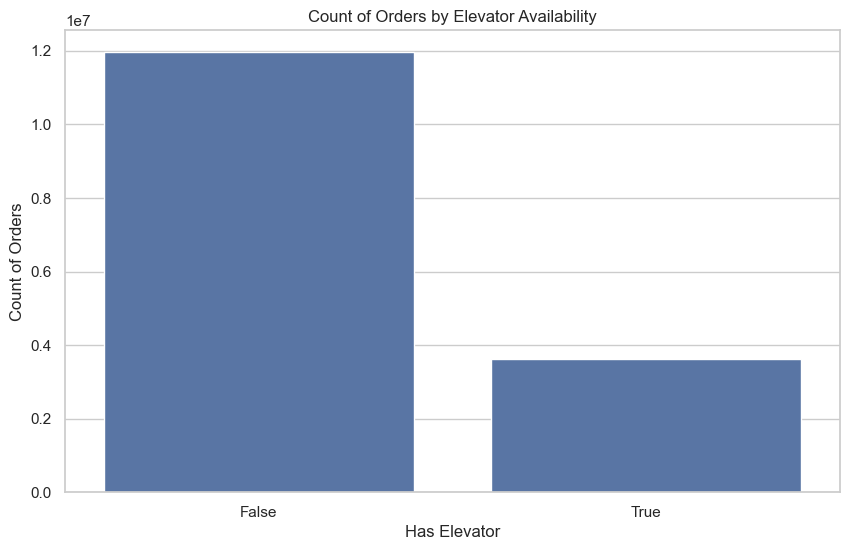

In [83]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style of the plots
sns.set(style="whitegrid")

# Plot the distribution of total article weight
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['total_article_weight_in_g'], bins=50, kde=True)
plt.title('Distribution of Total Article Weight')
plt.xlabel('Total Article Weight (g)')
plt.ylabel('Frequency')
plt.show()

# Plot the count of orders by warehouse
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='warehouse_id', order=merged_df['warehouse_id'].value_counts().index)
plt.title('Count of Orders by Warehouse')
plt.xlabel('Warehouse ID')
plt.ylabel('Count of Orders')
plt.show()

# Plot the distribution of service time in minutes
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['service_time_in_minutes'], bins=50, kde=True)
plt.title('Distribution of Service Time in Minutes')
plt.xlabel('Service Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot the count of orders by floor
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='floor', order=merged_df['floor'].value_counts().index)
plt.title('Count of Orders by Floor')
plt.xlabel('Floor')
plt.ylabel('Count of Orders')
plt.show()

# Plot the count of orders by whether they have an elevator
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='has_elevator')
plt.title('Count of Orders by Elevator Availability')
plt.xlabel('Has Elevator')
plt.ylabel('Count of Orders')
plt.show()

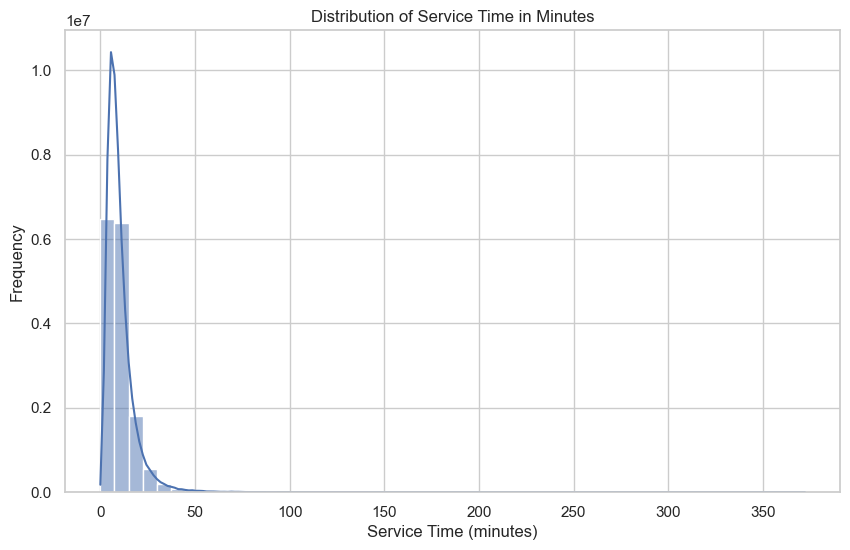

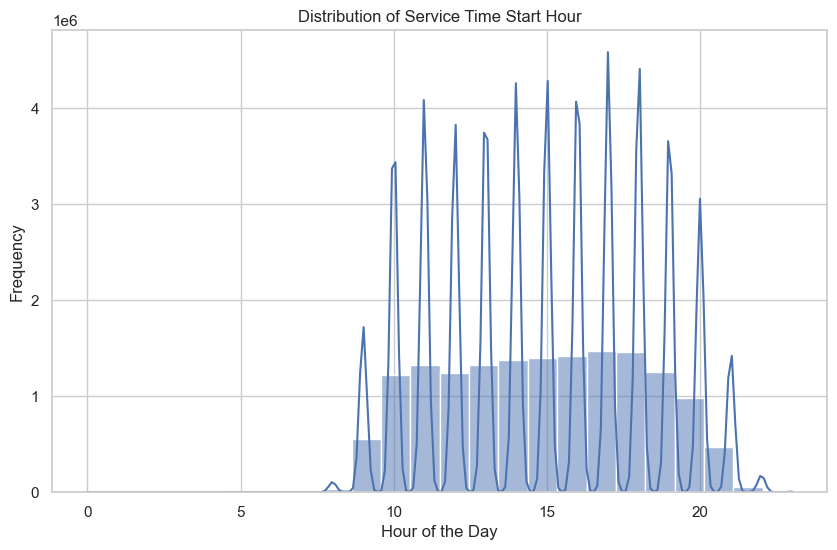

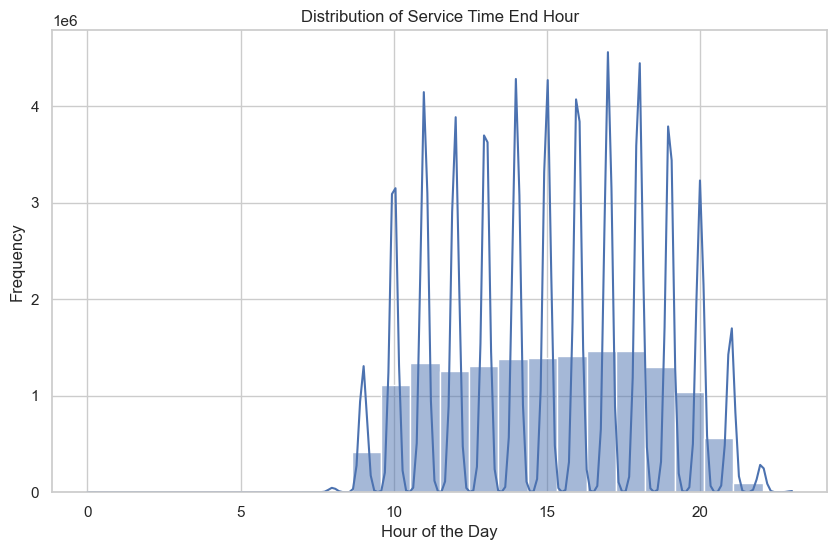

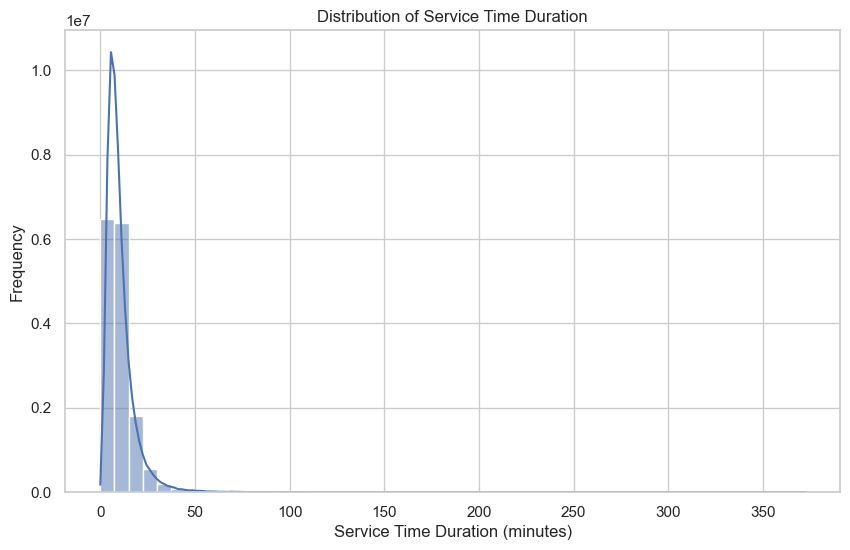

In [84]:
# Plot the distribution of service time in minutes
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['service_time_in_minutes'], bins=50, kde=True)
plt.title('Distribution of Service Time in Minutes')
plt.xlabel('Service Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of service time start
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['service_time_start'].dt.hour, bins=24, kde=True)
plt.title('Distribution of Service Time Start Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of service time end
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['service_time_end'].dt.hour, bins=24, kde=True)
plt.title('Distribution of Service Time End Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of service time duration
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['service_time_in_minutes'], bins=50, kde=True)
plt.title('Distribution of Service Time Duration')
plt.xlabel('Service Time Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

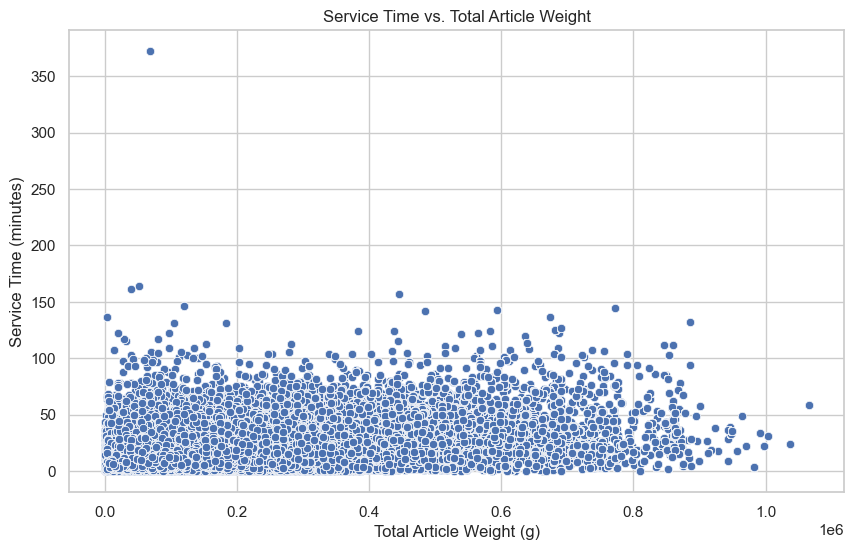

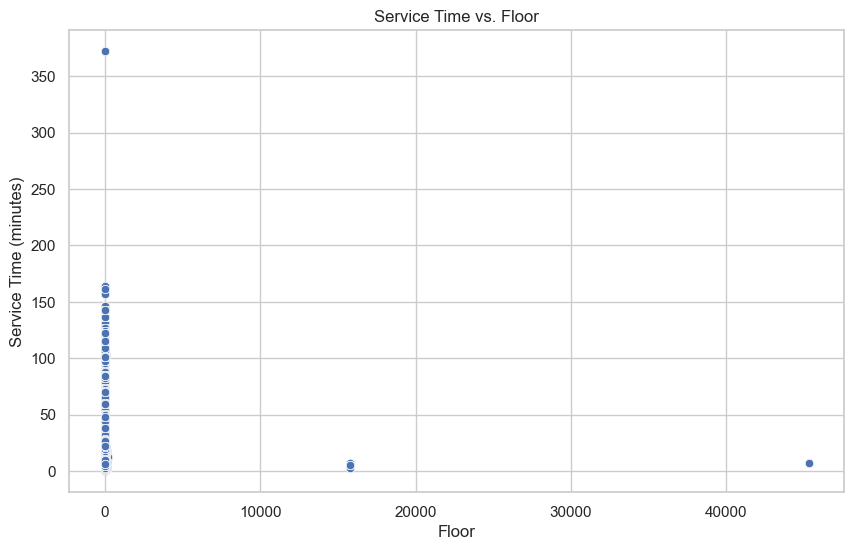

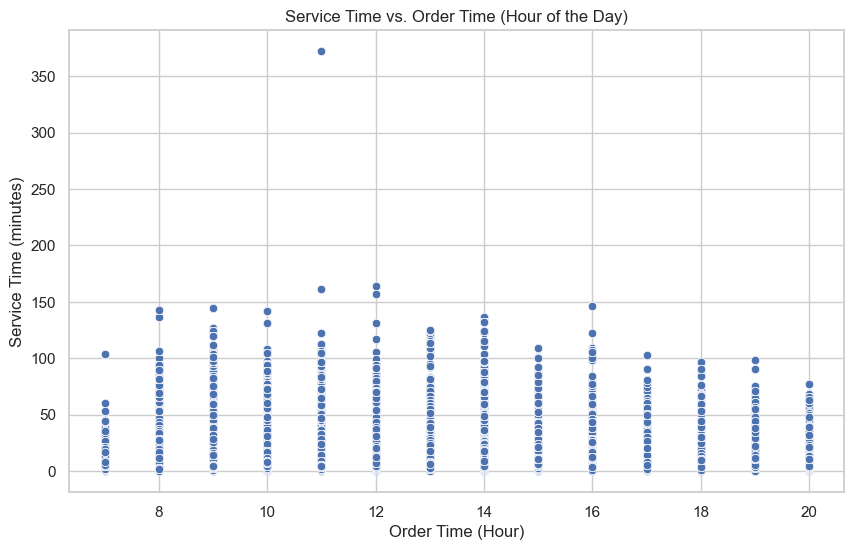

In [85]:
# Scatter plot of service time vs. total article weight
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='total_article_weight_in_g', y='service_time_in_minutes')
plt.title('Service Time vs. Total Article Weight')
plt.xlabel('Total Article Weight (g)')
plt.ylabel('Service Time (minutes)')
plt.show()

# Scatter plot of service time vs. floor
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='floor', y='service_time_in_minutes')
plt.title('Service Time vs. Floor')
plt.xlabel('Floor')
plt.ylabel('Service Time (minutes)')
plt.show()

# Scatter plot of service time vs. order time (hour of the day)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x=merged_df['order_time'].dt.hour, y='service_time_in_minutes')
plt.title('Service Time vs. Order Time (Hour of the Day)')
plt.xlabel('Order Time (Hour)')
plt.ylabel('Service Time (minutes)')
plt.show()

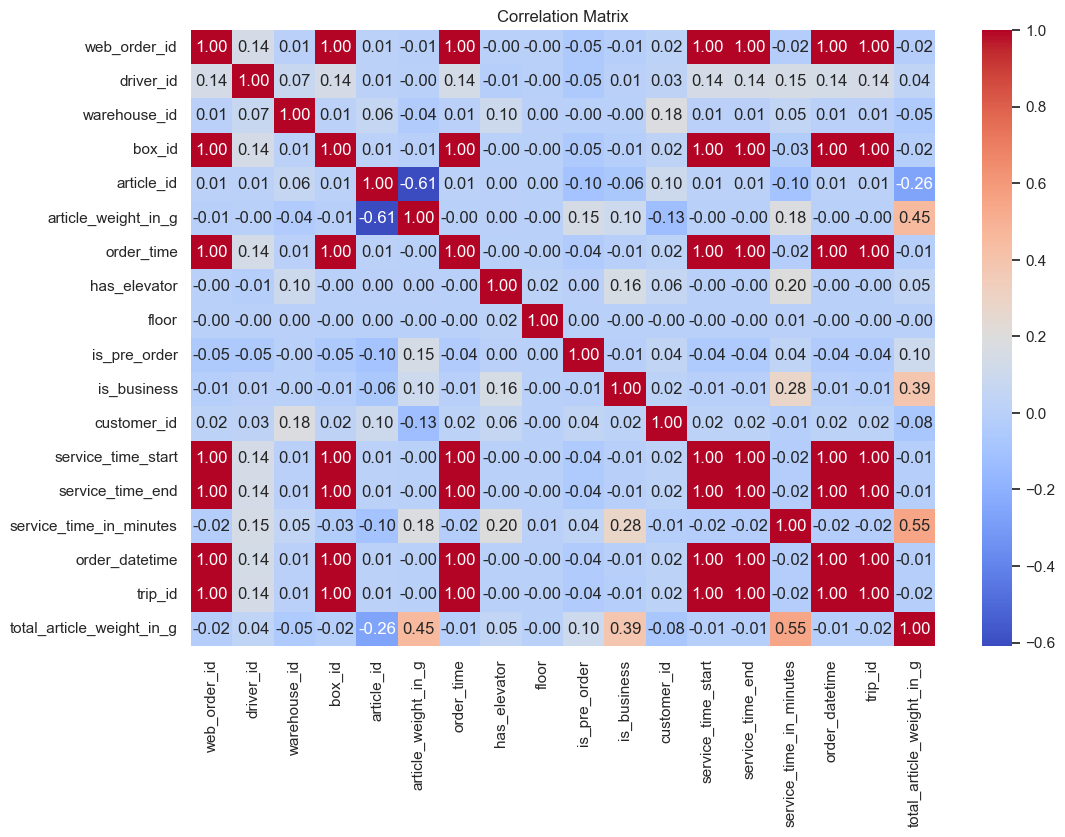

Average values for numerical columns:
web_order_id                                       765336.986385
driver_id                                            4516.053013
warehouse_id                                           22.370688
box_id                                           24518159.996479
article_id                                          10240.271744
article_weight_in_g                                  7909.640606
order_time                   2024-12-15 05:35:43.323685888+01:00
has_elevator                                            0.232566
floor                                                   1.637133
is_pre_order                                            0.672885
is_business                                              0.13843
customer_id                                         324862.34573
service_time_start           2024-12-15 07:00:24.518723584+01:00
service_time_end             2024-12-15 07:10:38.585647872+01:00
service_time_in_minutes                             

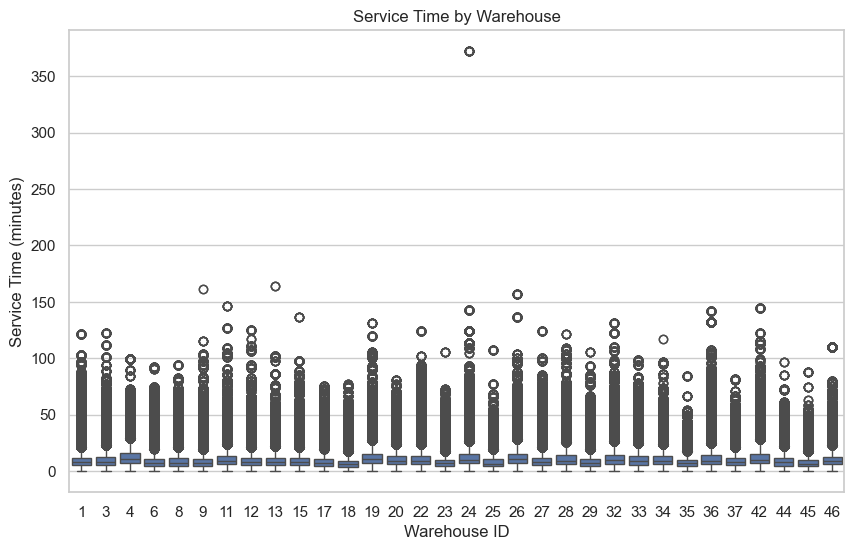

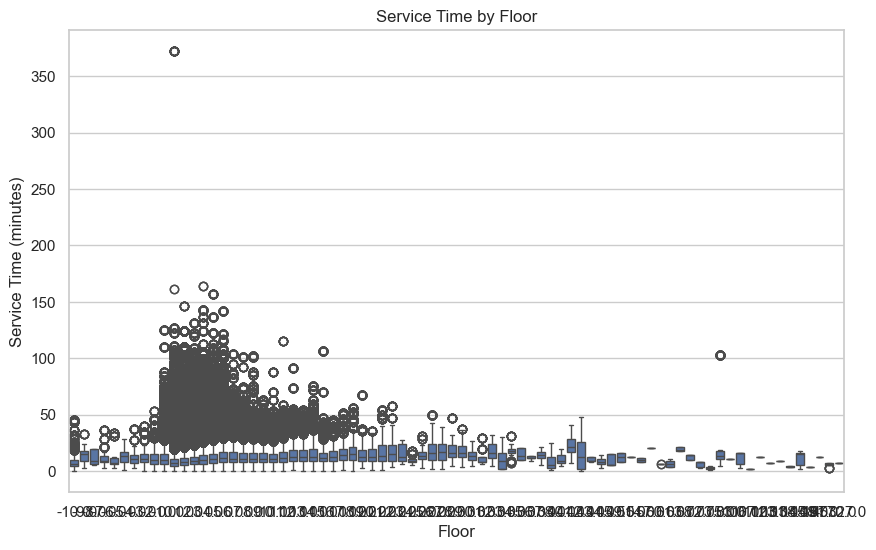

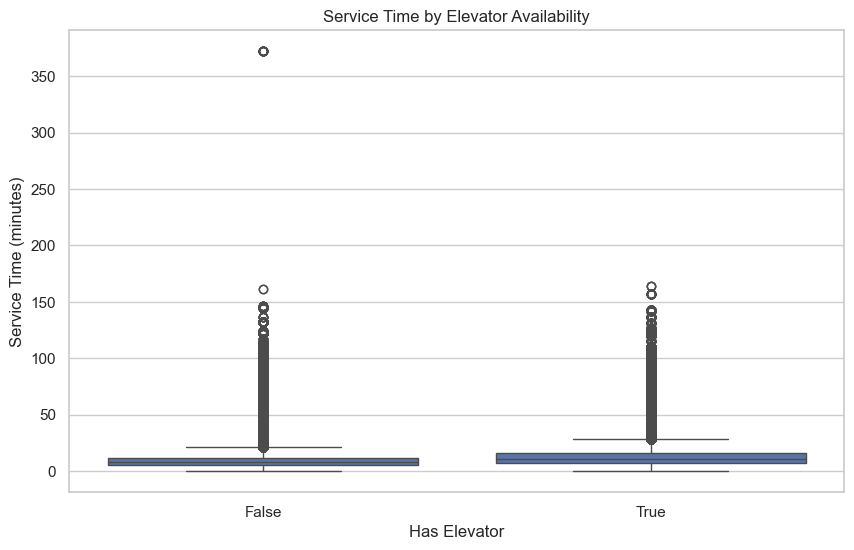

In [86]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Calculate average values for numerical columns
average_values = merged_df.mean()
print("Average values for numerical columns:")
print(average_values)

# Box plot of service time by warehouse
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='warehouse_id', y='service_time_in_minutes')
plt.title('Service Time by Warehouse')
plt.xlabel('Warehouse ID')
plt.ylabel('Service Time (minutes)')
plt.show()

# Box plot of service time by floor
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='floor', y='service_time_in_minutes')
plt.title('Service Time by Floor')
plt.xlabel('Floor')
plt.ylabel('Service Time (minutes)')
plt.show()

# Box plot of service time by elevator availability
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='has_elevator', y='service_time_in_minutes')
plt.title('Service Time by Elevator Availability')
plt.xlabel('Has Elevator')
plt.ylabel('Service Time (minutes)')
plt.show()

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D

# # Drop entries with NaN values in the 'floor' column
# no_elevator_df = merged_df[merged_df['has_elevator'] == 0].dropna(subset=['floor'])
# has_elevator_df = merged_df[merged_df['has_elevator'] == 1].dropna(subset=['floor'])

# # Create a 3D plot for entries where has_elevator is 0
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(no_elevator_df['article_weight_in_g'], no_elevator_df['floor'], no_elevator_df['service_time_in_minutes'], c='r', marker='o')
# ax.set_title('Service Time vs. Article Weight and Floor (No Elevator)')
# ax.set_xlabel('Article Weight (g)')
# ax.set_ylabel('Floor')
# ax.set_zlabel('Service Time (minutes)')
# plt.show()

# # Create a 3D plot for entries where has_elevator is 1
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(has_elevator_df['article_weight_in_g'], has_elevator_df['floor'], has_elevator_df['service_time_in_minutes'], c='b', marker='^')
# ax.set_title('Service Time vs. Article Weight and Floor (Has Elevator)')
# ax.set_xlabel('Article Weight (g)')
# ax.set_ylabel('Floor')
# ax.set_zlabel('Service Time (minutes)')
# plt.show()


KeyboardInterrupt: 

In [89]:
from sklearn.model_selection import train_test_split

# Extract unique web_order_ids
unique_web_order_ids = merged_df['web_order_id'].unique()

# Split the web_order_ids into training and testing sets
web_order_id_train, web_order_id_test = train_test_split(unique_web_order_ids, test_size=0.2, random_state=42)

# Create the training and testing datasets based on the split web_order_ids
train_df = merged_df[merged_df['web_order_id'].isin(web_order_id_train)]
test_df = merged_df[merged_df['web_order_id'].isin(web_order_id_test)]

# Define the features and target variable for training and testing sets
X_train = train_df.drop(columns=['service_time_in_minutes'])
y_train = train_df['service_time_in_minutes']
X_test = test_df.drop(columns=['service_time_in_minutes'])
y_test = test_df['service_time_in_minutes']

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (12470241, 17)
X_test shape: (3114622, 17)
y_train shape: (12470241,)
y_test shape: (3114622,)


In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Random predictions
random_predictions = np.random.uniform(low=y_train.min(), high=y_train.max(), size=len(y_test))
random_mae = mean_absolute_error(y_test, random_predictions)
random_mse = mean_squared_error(y_test, random_predictions)
random_r2 = r2_score(y_test, random_predictions)
print(f"Random Predictions MAE: {random_mae}")
print(f"Random Predictions MSE: {random_mse}")
print(f"Random Predictions R2: {random_r2}")

# Average prediction based on unique web_order_id
unique_test_df = test_df.drop_duplicates(subset='web_order_id')
unique_y_test = unique_test_df['service_time_in_minutes']

average_prediction = np.full_like(unique_y_test, y_train.mean())
average_mae = mean_absolute_error(unique_y_test, average_prediction)
average_mse = mean_squared_error(unique_y_test, average_prediction)
average_r2 = r2_score(unique_y_test, average_prediction)
print(f"Average Prediction MAE: {average_mae}")
print(f"Average Prediction MSE: {average_mse}")
print(f"Average Prediction R2: {average_r2}")

# Rule-based predictions
# For simplicity, let's assume the rule is to predict the average service time for each warehouse
warehouse_avg_service_time = train_df.groupby('warehouse_id')['service_time_in_minutes'].mean()
rule_based_predictions = test_df['warehouse_id'].map(warehouse_avg_service_time).fillna(y_train.mean())
rule_based_mae = mean_absolute_error(y_test, rule_based_predictions)
rule_based_mse = mean_squared_error(y_test, rule_based_predictions)
print(f"Rule-based Predictions MAE: {rule_based_mae}")
print(f"Rule-based Predictions MSE: {rule_based_mse}")

Random Predictions MAE: 72.76281282639943
Random Predictions MSE: 7451.486894894974
Random Predictions R2: -124.29035712155175
Average Prediction MAE: 4.561933134927934
Average Prediction MSE: 39.61890969397118
Average Prediction R2: -0.016903097675741607
Rule-based Predictions MAE: 4.966031073121452
Rule-based Predictions MSE: 57.408415297102124


Total count: 1534634
    unique_box_count   count
0                  1  966271
1                  2  307728
2                  3  163763
3                  4   57691
4                  5   23140
5                  6    8923
6                  7    3752
7                  8    1514
8                  9     740
9                 10     422
10                11     214
11                12     143
12                13      91
13                14      62
14                15      42
15                16      29
16                17      17
17                20      13
18                19      12
19                18       8
20                22       6
21                30       5
22                21       5
23                23       5
24                24       4
25                35       4
26                33       3
27                27       3
28                34       2
29                26       2
30                36       2
31                39       2
32                32  

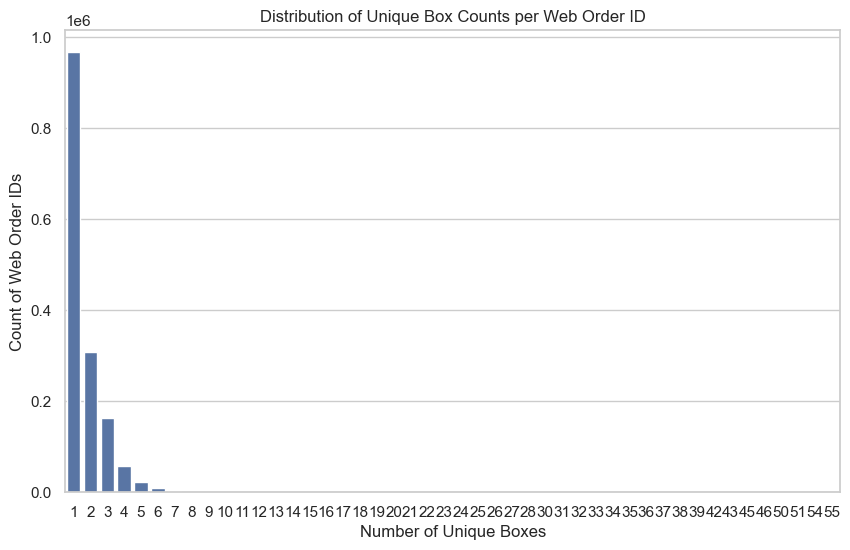

In [93]:
# Replace NaN values in the 'box_id' column with 0
merged_df['box_id'] = merged_df['box_id'].fillna(0)

# Calculate the number of unique box IDs per web_order_id
box_counts = merged_df.groupby('web_order_id')['box_id'].nunique().reset_index()
box_counts.columns = ['web_order_id', 'unique_box_count']

# Add the unique box counts to the merged_df
merged_df = merged_df.merge(box_counts, on='web_order_id', how='left')

# Count the occurrences of each unique box count
box_count_distribution = box_counts['unique_box_count'].value_counts().reset_index()
box_count_distribution.columns = ['unique_box_count', 'count']

# Sum up the "count" column
total_count = box_count_distribution['count'].sum()
print(f"Total count: {total_count}")

# Print the distribution
print(box_count_distribution)

# Plot the histogram of the box count distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=box_count_distribution, x='unique_box_count', y='count')
plt.title('Distribution of Unique Box Counts per Web Order ID')
plt.xlabel('Number of Unique Boxes')
plt.ylabel('Count of Web Order IDs')
plt.show()

In [95]:
# Check if there is any difference between unique_box_counts_x and unique_box_counts_y
difference = merged_df['unique_box_count_x'] != merged_df['unique_box_count_y']

# Display the rows where there is a difference
differences_df = merged_df[difference]

# Print the number of rows with differences
print(f"Number of rows with differences: {len(differences_df)}")

# Display the rows with differences
display(differences_df)

Number of rows with differences: 0


,web_order_id,driver_id,warehouse_id,box_id,article_id,article_weight_in_g,order_time,has_elevator,floor,is_pre_order,is_business,customer_id,service_time_start,service_time_end,service_time_in_minutes,order_datetime,trip_id,total_article_weight_in_g,unique_box_count_x,unique_box_count_y


In [97]:
# Calculate the correlation between unique_box_counts and service_time_in_minutes
correlation = merged_df['unique_box_count_x'].corr(merged_df['service_time_in_minutes'])

# Display the correlation
print(f"Correlation between unique_box_counts and service_time_in_minutes: {correlation}")

Correlation between unique_box_counts and service_time_in_minutes: 0.11802609719671915


In [99]:
# Calculate the average service time in minutes for each article_id
article_service_time_avg = merged_df.groupby('article_id')['service_time_in_minutes'].mean().reset_index()

# Rename the columns for clarity
article_service_time_avg.columns = ['article_id', 'average_service_time']

# Find the article with the highest average service time
highest_service_time_article = article_service_time_avg.loc[article_service_time_avg['average_service_time'].idxmax()]

# Find the article with the lowest average service time
lowest_service_time_article = article_service_time_avg.loc[article_service_time_avg['average_service_time'].idxmin()]

# Display the results
print("Article with the highest average service time:")
print(highest_service_time_article)

print("\nArticle with the lowest average service time:")
print(lowest_service_time_article)

# Print out the article IDs with the highest and lowest average service times
# Get the 10 articles with the highest average service time
top_10_highest_service_time_articles = article_service_time_avg.nlargest(10, 'average_service_time')

# Get the 10 articles with the lowest average service time
top_10_lowest_service_time_articles = article_service_time_avg.nsmallest(10, 'average_service_time')

# Print the article IDs with the highest and lowest average service times
print("\nTop 10 Article IDs with the highest average service time:")
print(top_10_highest_service_time_articles['article_id'].values)

print("\nTop 10 Article IDs with the lowest average service time:")
print(top_10_lowest_service_time_articles['article_id'].values)

Article with the highest average service time:
article_id              15043.000000
average_service_time       32.072222
Name: 3854, dtype: float64

Article with the lowest average service time:
article_id              19320.000000
average_service_time        1.583333
Name: 5137, dtype: float64

Top 10 Article IDs with the highest average service time:
[15043 20619 18544 20826 17719 20316 21448 15215 21243 20955]

Top 10 Article IDs with the lowest average service time:
[19320 18543 18796 21188 16955 10882  9063 17093 23333 11743]


In [100]:
# Calculate the average service time over all unique web_order_ids
average_service_time_overall = merged_df.groupby('web_order_id')['service_time_in_minutes'].first().mean()
print(f"Average service time over all unique web_order_ids: {average_service_time_overall}")

# Calculate the MAE for each article
article_mae = merged_df.groupby('article_id')['service_time_in_minutes'].apply(lambda x: (x - average_service_time_overall).abs().mean()).reset_index()
article_mae.columns = ['article_id', 'mae']

# Get the top 10 articles with the greatest MAE
top_10_highest_mae_articles = article_mae.nlargest(30, 'mae')
print("\nTop 10 Article IDs with the greatest MAE:")
print(top_10_highest_mae_articles)

# Get the lowest 10 articles with the greatest MAE
top_10_lowest_mae_articles = article_mae.nsmallest(10, 'mae')
print("\nTop 10 Article IDs with the lowest MAE:")
print(top_10_lowest_mae_articles)

Average service time over all unique web_order_ids: 9.419347879899702

Top 10 Article IDs with the greatest MAE:
      article_id        mae
5746       20619  22.753584
3854       15043  22.652874
4850       18544  19.913985
6105       21243  19.187995
5841       20826  17.863985
4485       17719  16.180652
5593       20316  16.080652
6226       21448  15.347318
630         2743  14.646558
3906       15215  14.580652
7711       23250  13.950000
6104       21242  13.000000
6393       21680  12.841667
5920       20955  12.780652
3640       14211  12.742337
5904       20932  12.681546
7962       23542  12.536111
7693       23231  12.497318
3339       13145  12.055315
3033       12041  12.037318
7961       23541  11.567561
8025       23705  11.397318
5426       20054  11.356992
4196       16566  11.259227
1044        4583  11.206665
2089        8769  11.161011
1224        6209  10.989205
7950       23528  10.975997
5504       20180  10.951358
5756       20668  10.759625

Top 10 Article IDs

In [121]:
# Calculate the mean and standard deviation of the service time in minutes
mean_service_time = merged_df['service_time_in_minutes'].mean()
std_service_time = merged_df['service_time_in_minutes'].std()

# Calculate the two sigma confidence interval
lower_bound = mean_service_time - 1 * std_service_time
upper_bound = mean_service_time + 1 * std_service_time

# Display the results
print(f"Mean service time: {mean_service_time}")
print(f"Standard deviation of service time: {std_service_time}")
print(f"Two sigma confidence interval: [{lower_bound}, {upper_bound}]")

Mean service time: 10.235150867652553
Standard deviation of service time: 7.589834016272707
Two sigma confidence interval: [2.645316851379846, 17.82498488392526]


In [102]:
# List of article IDs to one-hot encode
article_ids_to_encode = [20619, 15043, 18544, 21243]

# Create one-hot encoding for the specified article IDs
one_hot_encoded_articles = pd.get_dummies(merged_df['article_id'].apply(lambda x: x if x in article_ids_to_encode else 'other'), prefix='article')

# Merge the one-hot encoded columns back into the original dataframe
merged_df = pd.concat([merged_df, one_hot_encoded_articles], axis=1)

# Display the first few rows of the updated dataframe to verify
display(merged_df.head())

,web_order_id,driver_id,warehouse_id,box_id,article_id,article_weight_in_g,order_time,has_elevator,floor,is_pre_order,...,trip_id,total_article_weight_in_g,unique_box_count_x,unique_box_count_y,unique_crate_count,article_15043,article_18544,article_20619,article_21243,article_other
0,51222,182,27,0.0,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,6296,226500,1,1,1.0,False,False,False,False,True
1,51222,182,27,0.0,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,6296,226500,1,1,1.0,False,False,False,False,True
2,51222,182,27,0.0,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,6296,226500,1,1,1.0,False,False,False,False,True
3,51222,182,27,0.0,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,6296,226500,1,1,1.0,False,False,False,False,True
4,51222,182,27,0.0,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,6296,226500,1,1,1.0,False,False,False,False,True


In [109]:
# Calculate the unique crate count for each web_order_id where box_id is 0
calculated_crate_counts = merged_df[merged_df['box_id'] == 0].groupby('web_order_id').size().reset_index(name='crate_count')

# Merge the calculated crate counts back into the original dataframe
merged_df = merged_df.merge(calculated_crate_counts, on='web_order_id', how='left')

display(merged_df.head())


,web_order_id,driver_id,warehouse_id,box_id,article_id,article_weight_in_g,order_time,has_elevator,floor,is_pre_order,...,article_18544,article_20619,article_21243,article_other,unique_crate_count_y,unique_crate_count,calculated_crate_count_x,crate_count_correct,calculated_crate_count_y,crate_count
0,51222,182,27,0.0,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,False,False,False,True,1.0,1.0,15.0,False,15.0,15.0
1,51222,182,27,0.0,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,False,False,False,True,1.0,1.0,15.0,False,15.0,15.0
2,51222,182,27,0.0,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,False,False,False,True,1.0,1.0,15.0,False,15.0,15.0
3,51222,182,27,0.0,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,False,False,False,True,1.0,1.0,15.0,False,15.0,15.0
4,51222,182,27,0.0,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,False,False,False,True,1.0,1.0,15.0,False,15.0,15.0


    crate_count    count
0           4.0  1621372
1           2.0  1597631
2           3.0  1460207
3           1.0  1433779
4           5.0  1348606
5           6.0  1322721
6           7.0   830432
7           8.0   767307
8           9.0   530788
9          10.0   528465
10         12.0   315630
11         11.0   291087
12         13.0   175414
13         14.0   163455
14         15.0   120614
15         16.0    97462
16         20.0    70139
17         17.0    56374
18         18.0    54020
19         19.0    34067
20         22.0    26981
21         21.0    25937
22         25.0    24848
23         24.0    24327
24         30.0    22978
25         23.0    19593
26         26.0    14560
27         27.0    11630
28         50.0    11289
29         28.0    10967
30         40.0    10409
31         29.0     7406
32         35.0     7365
33         32.0     7142
34         31.0     5738
35         34.0     5509
36         36.0     4947
37         33.0     4920
38         38.0     3576


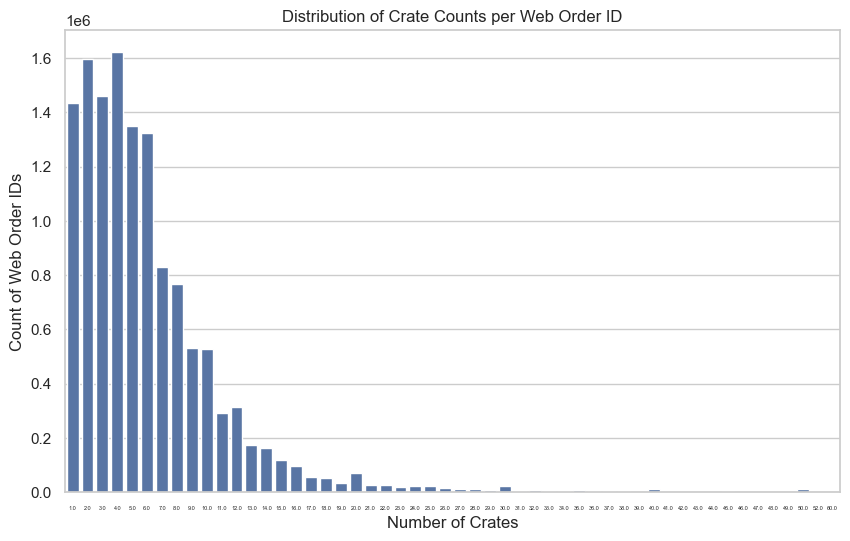

In [113]:
# Print the crate count distribution
crate_count_distribution = merged_df['crate_count'].value_counts().reset_index()
crate_count_distribution.columns = ['crate_count', 'count']
print(crate_count_distribution)

# Plot the histogram of the crate count distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=crate_count_distribution, x='crate_count', y='count')
plt.title('Distribution of Crate Counts per Web Order ID')
plt.xlabel('Number of Crates')
plt.ylabel('Count of Web Order IDs')
plt.xticks(fontsize=4)  # Make the text size of the x-axis smaller
plt.show()

In [5]:
import pandas as pd
import os

def merge_tables(df_orders, df_driver_order_mapping, df_service_times):
    df = pd.merge(df_orders, df_service_times, on="web_order_id", how='left', suffixes=('', '_y'))
    df = pd.merge(df, df_driver_order_mapping, on="web_order_id", how='left', suffixes=('', '_y'))
    df.drop(df.filter(regex='_y$').columns, axis=1, inplace=True)
    return df

root_path_data = './data/'
df_order_articles = pd.read_parquet('data/masked_order_articles.parquet')

df_orders = pd.read_parquet(os.path.join(root_path_data, "masked_orders.parquet"))
df_driver_order_mapping = pd.read_parquet(os.path.join(root_path_data, 'masked_driver_order_mapping.parquet'))
df_service_times = pd.read_parquet(os.path.join(root_path_data, 'masked_service_times.parquet'))
df_order_articles = pd.read_parquet(os.path.join(root_path_data, 'masked_order_articles.parquet'))
df = merge_tables(df_orders, df_driver_order_mapping, df_service_times)


# Merge box ids to orders
df_crate_counts = pd.merge(df, df_order_articles[['web_order_id', 'box_id']], on='web_order_id', how='left', suffixes=('', '_y'))
df_crate_counts.drop(df.filter(regex='_y$').columns, axis=1, inplace=True)
df_crate_counts = df_crate_counts[['web_order_id', 'box_id']]

# Group by web_order_id
# group = df_crate_counts.groupby('web_order_id')
# df_crate_counts["crate_count"] = group.agg({'box_id': 'nunique'}).reset_index()['box_id']
# df_crate_counts["crate_count"] += group["box_id"].transform(lambda x: x.isnull().sum())
# df_crate_counts = df_crate_counts[['web_order_id', 'crate_count']]
# # Merge duplicates
# df_crate_counts = df_crate_counts.drop_duplicates()
df_tmp = df_crate_counts.copy()
df_tmp['box_id'] = df_tmp['box_id'].fillna(0)
nan_boxes_df = df_tmp[df_tmp['box_id'] == 0]
drink_count = nan_boxes_df.groupby('web_order_id').count()

df_tmp = df_crate_counts.dropna(axis=0, subset=['box_id'])
drink_count['food_boxes'] = df_tmp.groupby('web_order_id')['box_id'].nunique()

drink_count = drink_count.fillna(0)

drink_count['crate_count'] = drink_count['food_boxes'] + drink_count['box_id']
drink_count.drop(columns=['box_id', 'food_boxes'], inplace=True)
df = pd.merge(df, drink_count, on="web_order_id", how='left')

In [8]:
# Calculate the correlation between unique_box_counts and service_time_in_minutes
correlation = df['crate_count'].corr(df['service_time_in_minutes'])

# Display the correlation
print(f"Correlation between unique_box_counts and service_time_in_minutes: {correlation}")

Correlation between unique_box_counts and service_time_in_minutes: 0.4672689501814519


In [9]:
# Calculate the average service time in minutes for each crate_count
crate_service_time_avg = df.groupby('crate_count')['service_time_in_minutes'].mean().reset_index()

# Rename the columns for clarity
crate_service_time_avg.columns = ['crate_count', 'average_service_time']

# Find the crate count with the highest average service time
highest_service_time_crate = crate_service_time_avg.loc[crate_service_time_avg['average_service_time'].idxmax()]

# Find the crate count with the lowest average service time
lowest_service_time_crate = crate_service_time_avg.loc[crate_service_time_avg['average_service_time'].idxmin()]

# Display the results
print("Crate count with the highest average service time:")
print(highest_service_time_crate)

print("\nCrate count with the lowest average service time:")
print(lowest_service_time_crate)

# Get the 10 crate counts with the highest average service time
top_10_highest_service_time_crates = crate_service_time_avg.nlargest(10, 'average_service_time')

# Get the 10 crate counts with the lowest average service time
top_10_lowest_service_time_crates = crate_service_time_avg.nsmallest(10, 'average_service_time')

# Print the crate counts with the highest and lowest average service times
print("\nTop 10 Crate Counts with the highest average service time:")
print(top_10_highest_service_time_crates['crate_count'].values)

print("\nTop 10 Crate Counts with the lowest average service time:")
print(top_10_lowest_service_time_crates['crate_count'].values)


Crate count with the highest average service time:
crate_count              72.0
average_service_time    132.0
Name: 65, dtype: float64

Crate count with the lowest average service time:
crate_count             1.000000
average_service_time    5.855344
Name: 0, dtype: float64

Top 10 Crate Counts with the highest average service time:
[72. 62. 56. 58. 65. 67. 60. 45. 55. 42.]

Top 10 Crate Counts with the lowest average service time:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [12]:
unique_crate_counts = df['crate_count'].unique()
print(unique_crate_counts)

[10. 14.  8. nan  4.  5.  7. 29.  2.  9.  6. 34. 17.  3. 16. 30. 19. 25.
 15. 12. 45. 22. 11. 13. 49. 37. 42. 18. 21. 20. 26. 24.  1. 36. 27. 44.
 23. 47. 40. 43. 32. 50. 64. 35. 28. 33. 38. 39. 31. 41. 48. 57. 52. 51.
 46. 56. 55. 54. 59. 58. 62. 67. 53. 65. 60. 63. 72.]


In [14]:
# Calculate the average service time over all unique web_order_ids
average_service_time_overall = df.groupby('web_order_id')['service_time_in_minutes'].first().mean()
print(f"Average service time over all unique web_order_ids: {average_service_time_overall}")

# Calculate the MAE for each crate count
crate_mae = df.groupby('crate_count')['service_time_in_minutes'].apply(lambda x: (x - average_service_time_overall).abs().mean()).reset_index()
crate_mae.columns = ['crate_count', 'mae']

# Get the top 10 crate counts with the greatest MAE
top_10_highest_mae_crates = crate_mae.nlargest(40, 'mae')
print("\nTop 10 Crate Counts with the greatest MAE:")
print(top_10_highest_mae_crates)

# Get the lowest 10 crate counts with the greatest MAE
top_10_lowest_mae_crates = crate_mae.nsmallest(10, 'mae')
print("\nTop 10 Crate Counts with the lowest MAE:")
print(top_10_lowest_mae_crates)

Average service time over all unique web_order_ids: 9.419257222563656

Top 10 Crate Counts with the greatest MAE:
    crate_count         mae
65         72.0  122.580743
60         62.0   76.914076
55         56.0   68.725187
57         58.0   61.580743
63         65.0   59.580743
64         67.0   45.264076
59         60.0   38.289076
44         45.0   33.938223
54         55.0   33.547409
41         42.0   33.300566
45         46.0   32.698346
42         43.0   30.563272
37         38.0   29.627193
43         44.0   29.113656
53         54.0   28.290371
52         53.0   28.172409
48         49.0   27.116573
46         47.0   26.978849
38         39.0   25.916786
51         52.0   25.795973
36         37.0   25.612184
47         48.0   25.488059
49         50.0   25.063172
40         41.0   24.963879
35         36.0   24.937516
61         63.0   24.797409
58         59.0   24.339076
34         35.0   24.059633
33         34.0   22.951803
62         64.0   22.080743
30         31.0   

In [119]:
# Calculate the mean and standard deviation of the service time in minutes
mean_service_time = merged_df['service_time_in_minutes'].mean()
std_service_time = merged_df['service_time_in_minutes'].std()

# Calculate the two sigma confidence interval
lower_bound = mean_service_time - 2 * std_service_time
upper_bound = mean_service_time + 2 * std_service_time

# Display the results
print(f"Mean service time: {mean_service_time}")
print(f"Standard deviation of service time: {std_service_time}")
print(f"Two sigma confidence interval: [{lower_bound}, {upper_bound}]")

Mean service time: 10.235150867652553
Standard deviation of service time: 7.589834016272707
Two sigma confidence interval: [-4.944517164892861, 25.414818900197968]


In [ ]:
from _1_Preprocessing import run_preprocessing

df_train, df_test = run_preprocessing()

In [ ]:


# Count the number of unique box_ids for each web_order_id
box_count = merged_df.groupby('web_order_id')['box_id'].nunique().reset_index()
box_count.columns = ['web_order_id', 'box_count']

# Print the number of groups
num_groups = box_count['web_order_id'].nunique()
print(f"Number of groups: {num_groups}")

# Merge the box_count back into the original dataframe
merged_df = merged_df.merge(box_count, on='web_order_id', how='left')

# Display the first few rows of the updated dataframe to verify
display(merged_df.head())


Number of groups: 1534634


,web_order_id,driver_id,warehouse_id,box_id,article_id,article_weight_in_g,order_time,has_elevator,floor,is_pre_order,...,trip_id,total_article_weight_in_g,box_count_x,crate_count,total_crate_count,num_rows,unique_box_counts,check_total_crate_count,box_count_y,box_count
0,51222,182,27,0.0,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,6296,226500,0,15,15,15,0,True,0,1
1,51222,182,27,0.0,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,6296,226500,0,15,15,15,0,True,0,1
2,51222,182,27,0.0,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,6296,226500,0,15,15,15,0,True,0,1
3,51222,182,27,0.0,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,6296,226500,0,15,15,15,0,True,0,1
4,51222,182,27,0.0,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,6296,226500,0,15,15,15,0,True,0,1


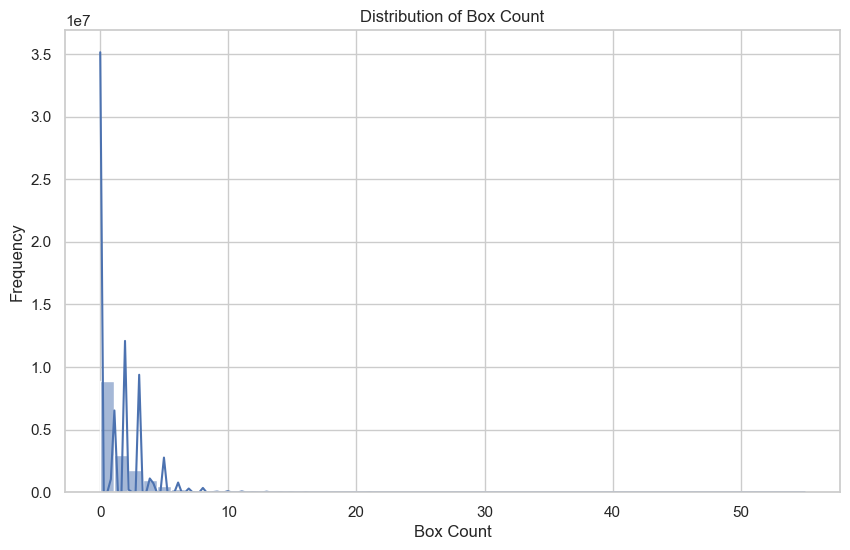

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['box_count'], bins=50, kde=True)
plt.title('Distribution of Box Count')
plt.xlabel('Box Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Count the number of crates (rows with NaN box_id) for each web_order_id
crate_count = merged_df[merged_df['box_id'].isna()].groupby('web_order_id').size().reset_index(name='crate_count')

# Merge the crate_count back into the original dataframe
merged_df = merged_df.merge(crate_count, on='web_order_id', how='left')

# Fill NaN values in crate_count with 0 (for web_order_ids that have no NaN box_id entries)
merged_df['crate_count'] = merged_df['crate_count'].fillna(0).astype(int)

# Display the first few rows of the updated dataframe to verify
display(merged_df.head())

,web_order_id,driver_id,warehouse_id,box_id,article_id,article_weight_in_g,order_time,has_elevator,floor,is_pre_order,is_business,customer_id,service_time_start,service_time_end,service_time_in_minutes,order_datetime,trip_id,total_article_weight_in_g,box_count,crate_count
0,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500,0,15
1,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500,0,15
2,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500,0,15
3,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500,0,15
4,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500,0,15


In [ ]:
# Sum the crate count and the box count in a new column
merged_df['total_crate_count'] = merged_df['crate_count'] + merged_df['box_count']

# Group by web_order_id and calculate the number of rows and unique box counts per web_order_id
grouped_df = merged_df.groupby('web_order_id').agg(
    num_rows=('web_order_id', 'size'),
    unique_box_counts=('box_id', 'nunique')
).reset_index()

# Merge the grouped data back into the original dataframe
merged_df = merged_df.merge(grouped_df, on='web_order_id', how='left')

# Check if the total crate count is the same as the number of rows + unique box counts per web_order_id
merged_df['check_total_crate_count'] = merged_df['total_crate_count'] == (merged_df['num_rows'] + merged_df['unique_box_counts'])

# Display the first few rows of the updated dataframe to verify
display(merged_df.head())

# Display the rows where the check failed
display(merged_df[~merged_df['check_total_crate_count']])

,web_order_id,driver_id,warehouse_id,box_id,article_id,article_weight_in_g,order_time,has_elevator,floor,is_pre_order,...,service_time_in_minutes,order_datetime,trip_id,total_article_weight_in_g,box_count,crate_count,total_crate_count,num_rows,unique_box_counts,check_total_crate_count
0,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500,0,15,15,15,0,True
1,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500,0,15,15,15,0,True
2,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500,0,15,15,15,0,True
3,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500,0,15,15,15,0,True
4,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,...,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500,0,15,15,15,0,True


,web_order_id,driver_id,warehouse_id,box_id,article_id,article_weight_in_g,order_time,has_elevator,floor,is_pre_order,...,service_time_in_minutes,order_datetime,trip_id,total_article_weight_in_g,box_count,crate_count,total_crate_count,num_rows,unique_box_counts,check_total_crate_count
23,166709,182,27,NaN,11217,11059,2024-11-11 08:30:00+01:00,True,1.0,True,...,12.366666,2024-11-11 08:30:00+01:00,26502,436277,3,25,28,28,3,False
24,166709,182,27,NaN,11217,11059,2024-11-11 08:30:00+01:00,True,1.0,True,...,12.366666,2024-11-11 08:30:00+01:00,26502,436277,3,25,28,28,3,False
25,166709,182,27,NaN,11217,11059,2024-11-11 08:30:00+01:00,True,1.0,True,...,12.366666,2024-11-11 08:30:00+01:00,26502,436277,3,25,28,28,3,False
26,166709,182,27,NaN,15824,17000,2024-11-11 08:30:00+01:00,True,1.0,True,...,12.366666,2024-11-11 08:30:00+01:00,26502,436277,3,25,28,28,3,False
27,166709,182,27,NaN,15824,17000,2024-11-11 08:30:00+01:00,True,1.0,True,...,12.366666,2024-11-11 08:30:00+01:00,26502,436277,3,25,28,28,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584838,474113,9240,18,24272578.0,8834,114,2024-11-28 11:00:06.150000+01:00,False,0.0,False,...,4.500000,2024-11-28 11:00:06.150000+01:00,75921,15321,2,0,2,35,2,False
15584839,474113,9240,18,24272578.0,22797,1000,2024-11-28 11:00:06.150000+01:00,False,0.0,False,...,4.500000,2024-11-28 11:00:06.150000+01:00,75921,15321,2,0,2,35,2,False
15584840,475628,9240,18,NaN,2572,10450,2024-11-28 13:30:00+01:00,False,2.0,True,...,6.500000,2024-11-28 13:30:00+01:00,76399,12580,1,1,2,3,1,False
15584841,475628,9240,18,24273940.0,18980,1065,2024-11-28 13:30:00+01:00,False,2.0,True,...,6.500000,2024-11-28 13:30:00+01:00,76399,12580,1,1,2,3,1,False
